In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
from matplotlib.offsetbox import AnchoredText

In [266]:
sys.path.append("../")

In [2]:
df = pd.read_csv('../data/medidas_coche.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     388 non-null    int64  
 1   distance       388 non-null    float64
 2   consume        388 non-null    float64
 3   speed          388 non-null    int64  
 4   temp_inside    376 non-null    object 
 5   temp_outside   388 non-null    int64  
 6   specials       388 non-null    object 
 7   gas_type       388 non-null    object 
 8   ac             388 non-null    int64  
 9   rain           388 non-null    int64  
 10  sun            388 non-null    int64  
 11  refill_liters  13 non-null     object 
 12  refill_gas     13 non-null     object 
 13  consumo_abs    388 non-null    float64
 14  CO2            388 non-null    float64
 15  CO2_km         388 non-null    float64
 16  speed_range    388 non-null    object 
 17  temp_o_range   387 non-null    object 
dtypes: float64

In [4]:
df.specials.value_counts()

Otro        295
Rain         32
Sun          27
AC           14
AC Rain      10
AC Sun        5
Snow          3
AC Snow       1
Rain_Sun      1
Name: specials, dtype: int64

In [5]:
clima = df.consume.groupby(df.specials).mean().sort_values()

In [6]:
df.consume.groupby(df.specials).mean().sort_values()

specials
Sun         4.277778
AC Sun      4.580000
AC          4.685714
Rain_Sun    4.700000
Otro        4.900678
Snow        5.166667
AC Rain     5.450000
Rain        5.453125
AC Snow     7.100000
Name: consume, dtype: float64

In [7]:
df.corr()

,Unnamed: 0,distance,consume,speed,temp_outside,ac,rain,sun,consumo_abs,CO2,CO2_km
Unnamed: 0,1.000000,0.103662,-0.344622,0.058154,0.701780,0.133447,-0.117062,0.279471,0.054453,0.054453,-0.344622
distance,0.103662,1.000000,-0.128967,0.562299,0.088175,-0.025738,-0.019791,0.081120,0.992101,0.992101,-0.128967
consume,-0.344622,-0.128967,1.000000,-0.227866,-0.320811,0.096591,0.248118,-0.170667,-0.052188,-0.052188,1.000000
speed,0.058154,0.562299,-0.227866,1.000000,0.015411,-0.035408,0.009489,0.081618,0.551847,0.551847,-0.227866
temp_outside,0.701780,0.088175,-0.320811,0.015411,1.000000,0.167562,-0.186315,0.346903,0.037877,0.037877,-0.320811
ac,0.133447,-0.025738,0.096591,-0.035408,0.167562,1.000000,0.242915,0.088598,-0.018700,-0.018700,0.096591
rain,-0.117062,-0.019791,0.248118,0.009489,-0.186315,0.242915,1.000000,-0.112650,0.009125,0.009125,0.248118
sun,0.279471,0.081120,-0.170667,0.081618,0.346903,0.088598,-0.112650,1.000000,0.064247,0.064247,-0.170667
consumo_abs,0.054453,0.992101,-0.052188,0.551847,0.037877,-0.018700,0.009125,0.064247,1.000000,1.000000,-0.052188
CO2,0.054453,0.992101,-0.052188,0.551847,0.037877,-0.018700,0.009125,0.064247,1.000000,1.000000,-0.052188


In [612]:
df_2 = df.consume.groupby(df.specials).mean().sort_values()
valores = df.consume.groupby(df.speed_range).median()

In [8]:
df.CO2_km.groupby(df.gas_type).median()

gas_type
E10     110.4
SP98    108.1
Name: CO2_km, dtype: float64

In [18]:
valores

speed_range
(0, 30]     5.2
(30, 60]    4.6
(60, 90]    4.9
Name: consume, dtype: float64

In [17]:
df_2

specials
Sun         4.277778
AC Sun      4.580000
AC          4.685714
Rain_Sun    4.700000
Otro        4.900678
Snow        5.166667
AC Rain     5.450000
Rain        5.453125
AC Snow     7.100000
Name: consume, dtype: float64

In [16]:
temperaturas = df.consume.groupby(df.temp_o_range).mean()
temperaturas

temp_o_range
(-5, 0]     5.190909
(0, 5]      5.391935
(10, 15]    4.789744
(15, 20]    4.354237
(20, 25]    4.317241
(25, 30]    4.421429
(30, 35]    4.633333
(5, 10]     5.174046
Name: consume, dtype: float64

In [19]:
emisiones = df.CO2_km.groupby(df.speed_range).mean()
emisiones

speed_range
(0, 30]     130.567073
(30, 60]    107.638321
(60, 90]    113.706250
Name: CO2_km, dtype: float64

In [20]:
hues = df.consume.groupby([df.speed_range, df.specials]).mean()
hues = hues.fillna(0)
hues

speed_range  specials
(0, 30]      AC          5.533333
             AC Rain     5.920000
             Otro        5.719672
             Rain        6.485714
             Sun         4.166667
(30, 60]     AC          4.454545
             AC Rain     4.700000
             AC Snow     7.100000
             AC Sun      4.633333
             Otro        4.667453
             Rain        5.165000
             Rain_Sun    4.700000
             Snow        5.166667
             Sun         4.260000
(60, 90]     AC Rain     5.400000
             AC Sun      4.500000
             Otro        4.877273
             Rain        5.160000
             Sun         5.300000
Name: consume, dtype: float64

In [21]:
df.consume.groupby(df.temp_o_range).median()

temp_o_range
(-5, 0]     4.90
(0, 5]      5.10
(10, 15]    4.65
(15, 20]    4.30
(20, 25]    4.20
(25, 30]    4.30
(30, 35]    4.60
(5, 10]     5.00
Name: consume, dtype: float64

In [22]:
df.consume.groupby([df.gas_type, df.speed_range]).mean()

gas_type  speed_range
E10       (0, 30]        5.490323
          (30, 60]       4.785088
          (60, 90]       4.886667
SP98      (0, 30]        5.790196
          (30, 60]       4.605000
          (60, 90]       4.994118
Name: consume, dtype: float64

In [27]:
gas_type_01 = df[df.gas_type == 'E10']
gas_type_02 = df[df.gas_type == 'SP98']
E10_gas = gas_type_01.consume.groupby(gas_type_01.speed_range).median()
SP98_gas = gas_type_02.consume.groupby(gas_type_02.speed_range).median()

[Text(0, 0, '(0, 30]'), Text(1, 0, '(30, 60]'), Text(2, 0, '(60, 90]')]

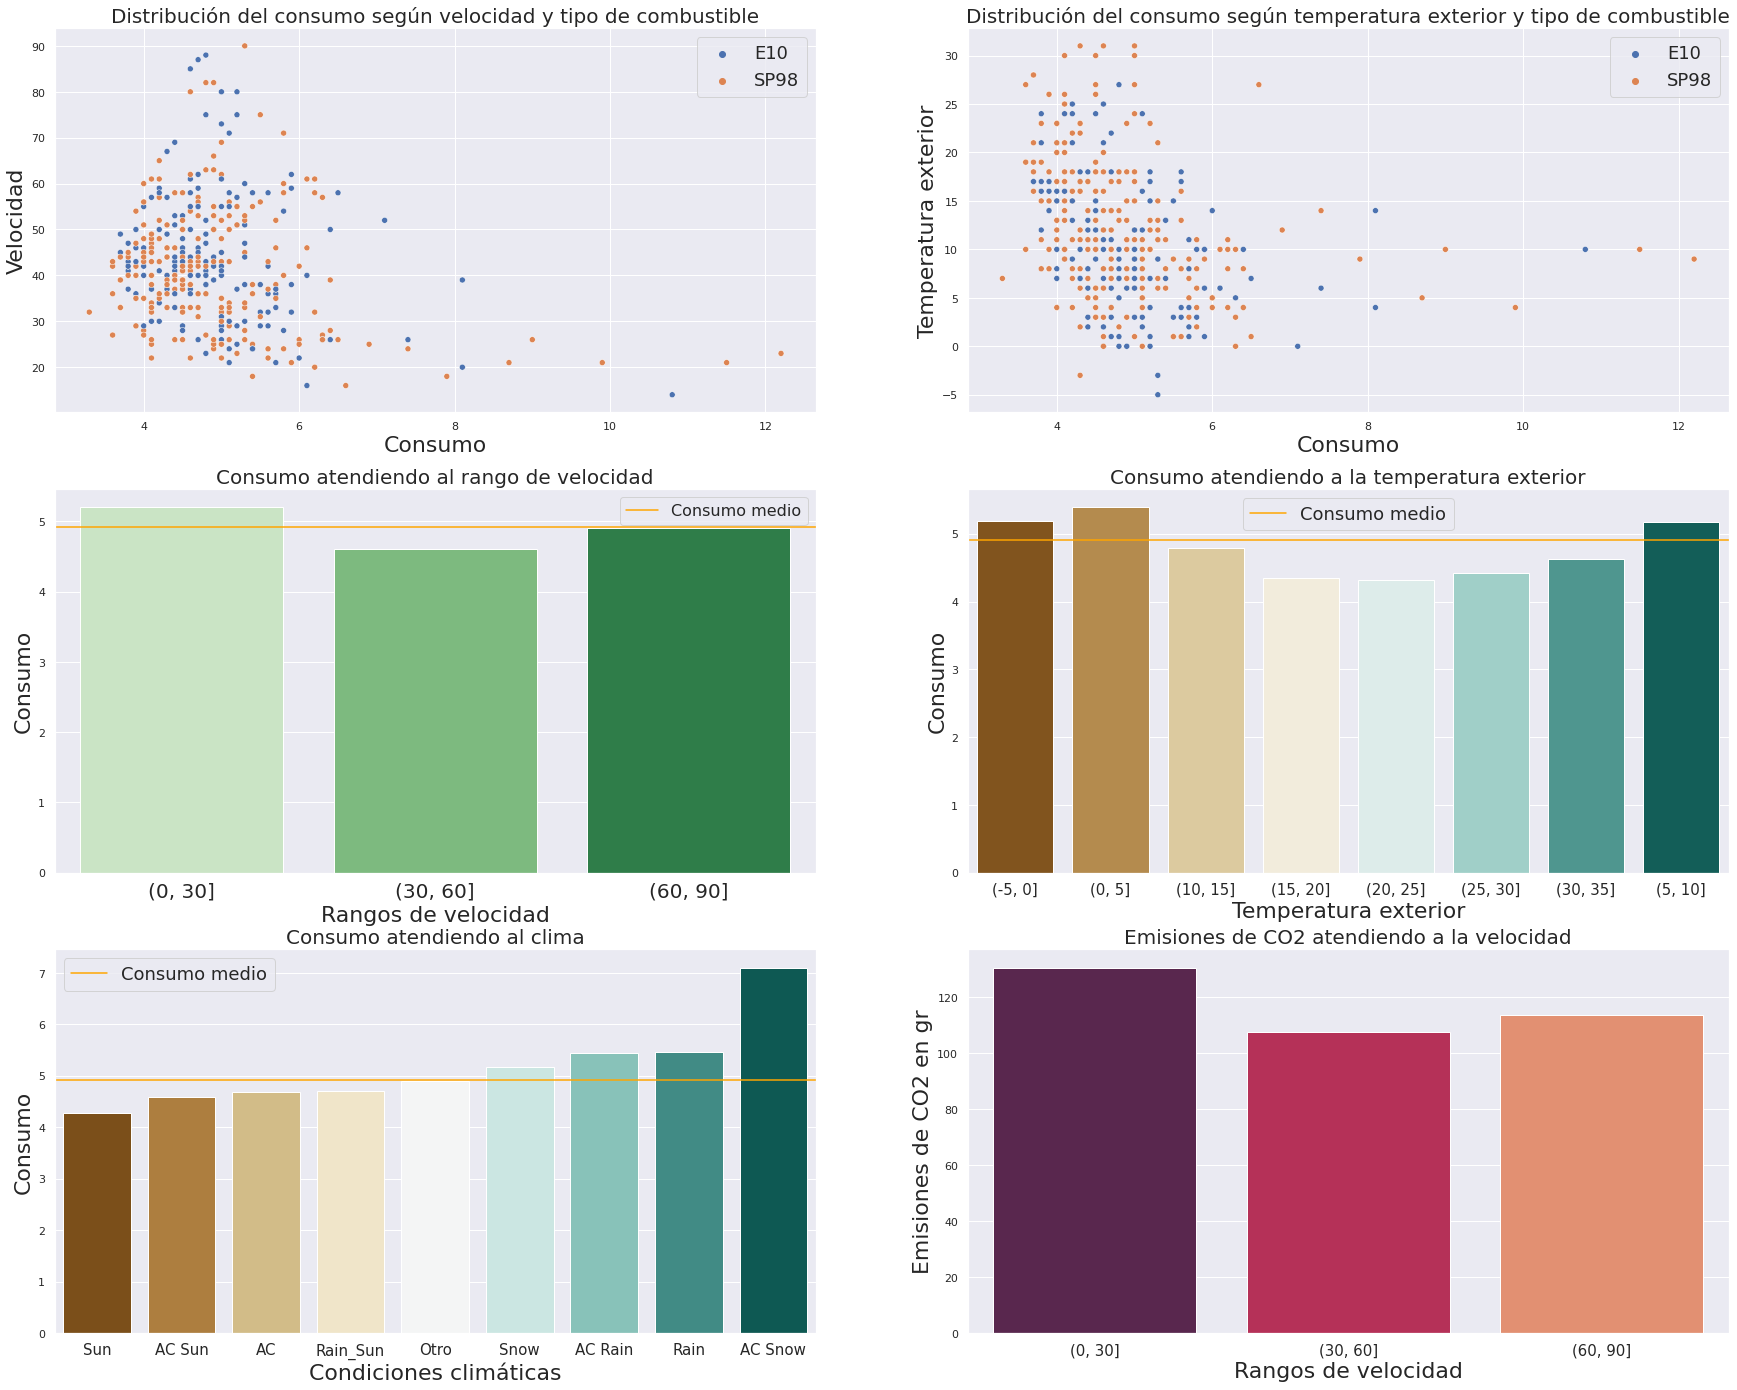

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 24))

mcv = sns.scatterplot(x = df.consume, y = df.speed, hue = df.gas_type, size_norm = (1,10), ax = axs[0,0])
mcv.set_xlabel("Consumo", fontsize = 22)
mcv.set_ylabel("Velocidad", fontsize = 22)
mcv.set_title("Distribución del consumo según velocidad y tipo de combustible", fontsize = 20)
mcv.legend(fontsize = 18)

mcto = sns.scatterplot(x = df.consume, y = df.temp_outside, hue = df.gas_type, size_norm = (1,10), ax = axs[0,1])
mcto.set_xlabel("Consumo", fontsize = 22)
mcto.set_ylabel("Temperatura exterior", fontsize = 22)
mcto.set_title("Distribución del consumo según temperatura exterior y tipo de combustible", fontsize = 20)
mcto.legend(fontsize = 18)

c_rango_s = sns.barplot(x = valores.index, y = valores.values, ax = axs[1,0], palette = 'Greens')
c_rango_s.set_xlabel("Rangos de velocidad", fontsize = 22)
c_rango_s.set_ylabel("Consumo", fontsize = 22)
c_rango_s.set_title("Consumo atendiendo al rango de velocidad", fontsize = 20)
c_rango_s.set_xticklabels(valores.index, fontdict = {'fontsize' : 20})
c_rango_s.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_rango_s.legend(fontsize = 16)

c_temp = sns.barplot(x = temperaturas.index, y = temperaturas.values, ax = axs[1,1], palette = 'BrBG')
c_temp.set_xlabel("Temperatura exterior", fontsize = 22)
c_temp.set_ylabel("Consumo", fontsize = 22)
c_temp.set_title("Consumo atendiendo a la temperatura exterior", fontsize = 20)
c_temp.set_xticklabels(temperaturas.index, fontdict = {'fontsize' : 15})
c_temp.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_temp.legend(fontsize = 18)

c_clima = sns.barplot(x = df_2.index, y = df_2.values, ax = axs[2,0], palette = 'BrBG')
c_clima.set_xlabel("Condiciones climáticas", fontsize = 22)
c_clima.set_ylabel("Consumo", fontsize = 22)
c_clima.set_title("Consumo atendiendo al clima", fontsize = 20)
c_clima.set_xticklabels(df_2.index, fontdict = {'fontsize' : 15})
c_clima.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_clima.legend(fontsize = 18)

c_clima = sns.barplot(x = emisiones.index, y = emisiones.values, ax = axs[2,1], palette = 'rocket')
c_clima.set_xlabel("Rangos de velocidad", fontsize = 22)
c_clima.set_ylabel("Emisiones de CO2 en gr", fontsize = 22)
c_clima.set_title("Emisiones de CO2 atendiendo a la velocidad", fontsize = 20)
c_clima.set_xticklabels(emisiones.index, fontdict = {'fontsize' : 15})

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

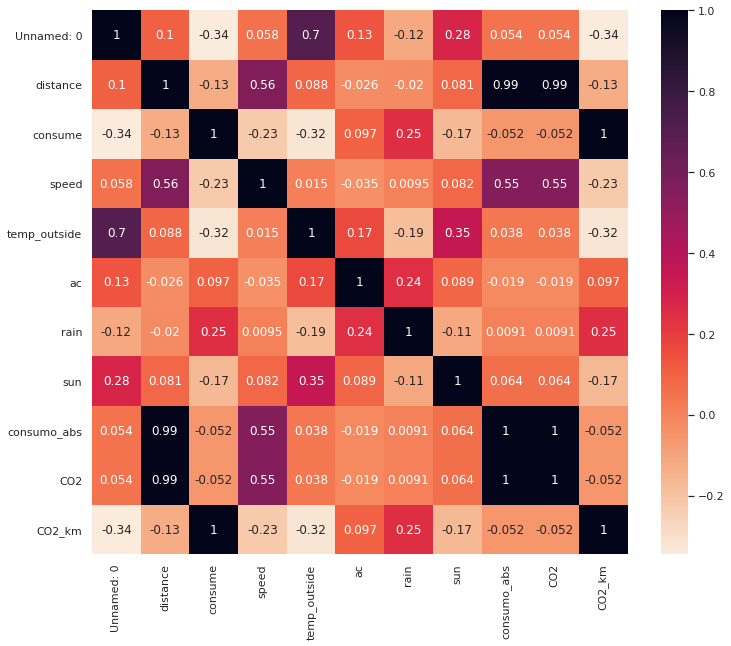

In [24]:
sns.set(rc={'figure.figsize' : (12, 10)})
print (type(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = sns.cm.rocket_r)

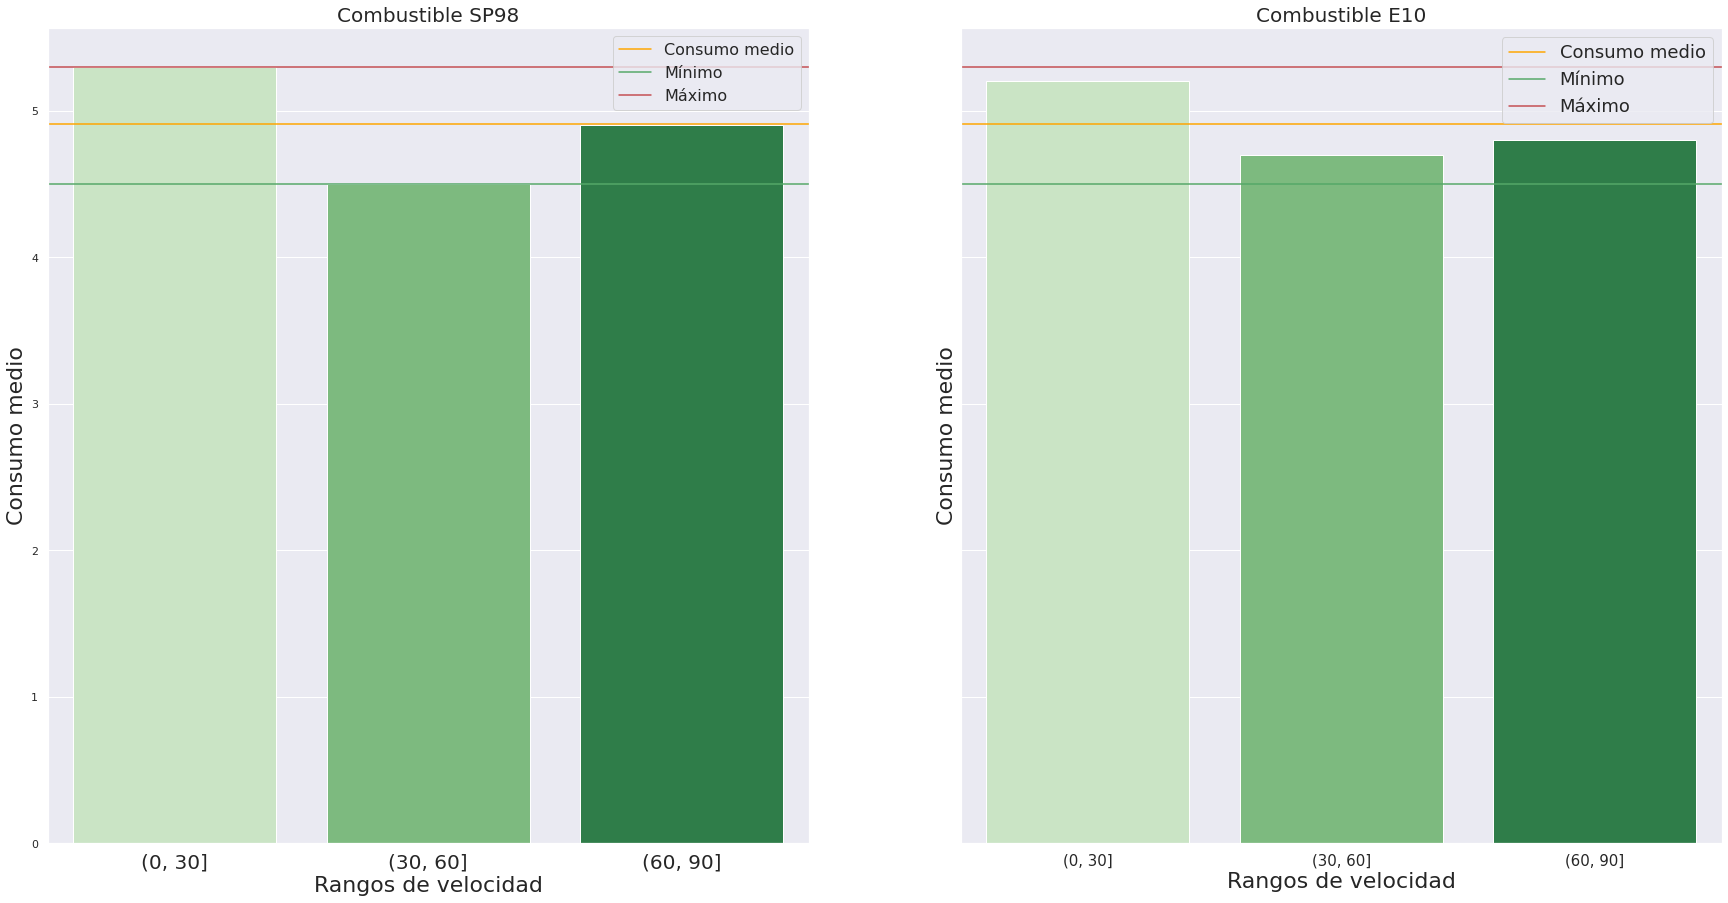

In [29]:
fig, ax2 = plt.subplots(ncols=2, figsize=(30, 15), sharey = True)

c_speed_98 = sns.barplot(x = SP98_gas.index, y = SP98_gas.values, ax = ax2[0], palette = 'Greens')
c_speed_98.set_xlabel("Rangos de velocidad", fontsize = 22)
c_speed_98.set_ylabel("Consumo medio", fontsize = 22)
c_speed_98.set_title("Combustible SP98", fontsize = 20)
c_speed_98.set_xticklabels(SP98_gas.index, fontdict = {'fontsize' : 20})
c_speed_98.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_speed_98.axhline(y=SP98_gas.min(), color="g", label = 'Mínimo')
c_speed_98.axhline(y=SP98_gas.max(), color="r", label = 'Máximo')
c_speed_98.legend(fontsize = 16)

c_speed_10 = sns.barplot(x = E10_gas.index, y = E10_gas.values, ax = ax2[1], palette = 'Greens')
c_speed_10.set_xlabel("Rangos de velocidad", fontsize = 22)
c_speed_10.set_ylabel("Consumo medio", fontsize = 22)
c_speed_10.set_title("Combustible E10", fontsize = 20)
c_speed_10.set_xticklabels(E10_gas.index, fontdict = {'fontsize' : 15})
c_speed_10.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_speed_10.axhline(y=SP98_gas.min(), color="g", label = 'Mínimo')
c_speed_10.axhline(y=SP98_gas.max(), color="r", label = 'Máximo')
c_speed_10.legend(fontsize = 18)

In [54]:
porcentaje = round((df.speed_range.value_counts(normalize=True)*100).sort_index(), 2)
porcentaje

(0, 30]     21.13
(30, 60]    70.62
(60, 90]     8.25
Name: speed_range, dtype: float64

[Text(0, 0, '(0, 30]'), Text(1, 0, '(30, 60]'), Text(2, 0, '(60, 90]')]

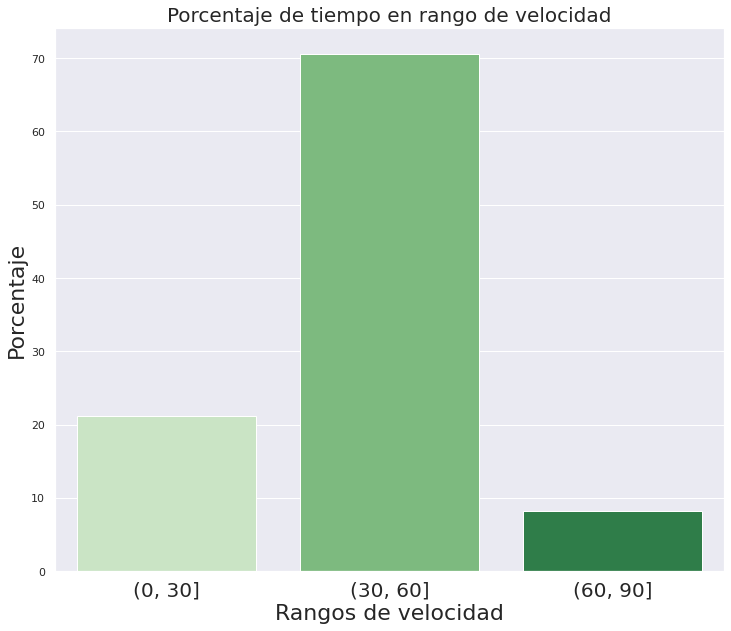

In [55]:
percent = sns.barplot(x = porcentaje.index, y = porcentaje.values, palette = 'Greens')
percent.set_xlabel("Rangos de velocidad", fontsize = 22)
percent.set_ylabel("Porcentaje", fontsize = 22)
percent.set_title("Porcentaje de tiempo en rango de velocidad", fontsize = 20)
percent.set_xticklabels(porcentaje.index, fontdict = {'fontsize' : 20})